<h1>Ford GoBike System Data</h1>

In [ ]:
#import needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [ ]:
#import data
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [ ]:
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [ ]:
#Convert start time and end_time to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [ ]:
#add start month num and start num char to the dataframe
df['user_type']= df['user_type'].astype('category')
df['start_station_name']= df['start_station_name'].astype('category')
df['end_station_name']= df['end_station_name'].astype('category')

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

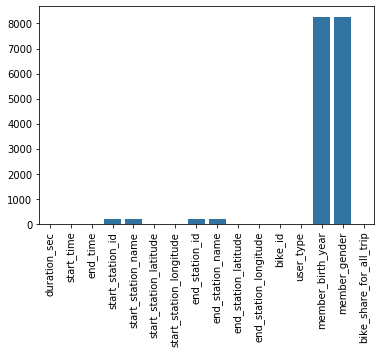

In [ ]:
#check for null values
nan_counts = df.isna().sum()
base_color = sns.color_palette()[0]
sns.barplot(x= nan_counts.index.values, y= nan_counts, color = base_color)
plt.xticks(rotation=90);
nan_counts

In [ ]:
#drop null vaues
df = df.dropna()

In [ ]:
#let`s check for duplicates
df.duplicated().sum()

0

In [ ]:
# we will extract month, dayofweek, hour from the start_time
df['start_month']= df.start_time.dt.strftime('%b')
df['start_day_week']= df.start_time.dt.strftime('%a')
df['start_hour']= df.start_time.dt.strftime('%H')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_day_week,start_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Feb,Thu,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Feb,Thu,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Feb,Thu,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Feb,Thu,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,Feb,Thu,23


In [ ]:
# we will extract month, dayofweek, hour from the end_time
df['end_month']= df.end_time.dt.strftime('%b')
df['end_day_week']= df.end_time.dt.strftime('%a')
df['end_hour']= df.end_time.dt.strftime('%H')

In [ ]:
df.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_day_week,start_hour,end_month,end_day_week,end_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,Feb,Thu,17,Mar,Fri,08
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,Feb,Thu,12,Mar,Fri,05
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,Feb,Thu,17,Mar,Fri,04
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,Feb,Thu,23,Mar,Fri,00
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959.0,Male,No,Feb,Thu,23,Mar,Fri,00


In [ ]:
#add age column
max_year = df.end_time.dt.year.max()
df['age'] = df['member_birth_year'].apply(lambda x:  int(max_year - x))


In [ ]:
#function to name plots
def xyt(x, y , t):
    plt.title(t)
    plt.xlabel(x)
    plt.ylabel(y);

<h3>Age vs Duration</h3>

What is the age of users with the longest rides?

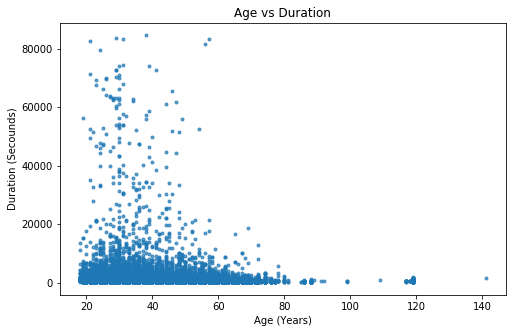

In [ ]:
#ploting duaration vs age
plt.figure(figsize = [8, 5])
plt.scatter(x = df["age"], y = df["duration_sec"], marker = '.', alpha = 0.7)
xyt("Age (Years)", "Duration (Secounds)", "Age vs Duration")
plt.show()

As most of the durations are below 6000 and age is below 80, lets crop the plot till those values.

In [ ]:
#ploting the same plot in a subplot
plt.figure(figsize = [12, 5])
plt.subplot(1, 2, 1)
plt.scatter(x = df["age"], y = df["duration_sec"], marker = '.', alpha = 0.7)
plt.axis([5, 85, 500, 6500])
plt.xlabel("Age (Years)")
plt.ylabel("Duration (Secounds)")


and lets make a heat map also

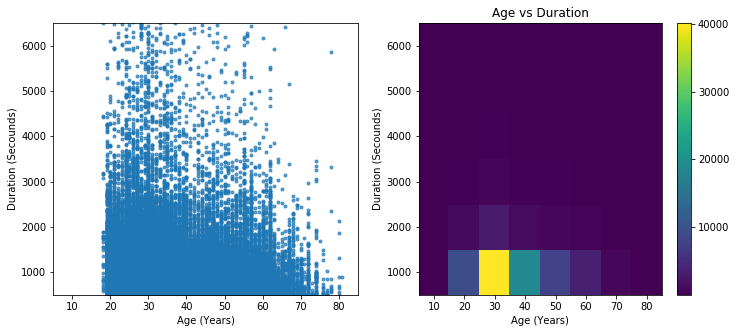

In [ ]:

#making heatmap of duration vs age of the plot
plt.subplot(1, 2, 2)

#making the x and y bins
bins_x = np.arange(5, 85+1, 10)
bins_y = np.arange(500, 6500+1, 1000)


plt.hist2d(df['age'], df['duration_sec'], bins = [bins_x, bins_y])
plt.colorbar(ticks=[10000, 20000, 30000, 40000]);
xyt("Age (Years)", "Duration (Secounds)", "Age vs Duration")

plt.show()

folks in their early 30's comprise the bulk of the rides.

<h3>Gender vs Duration</h3>

What gender do the longest rides?

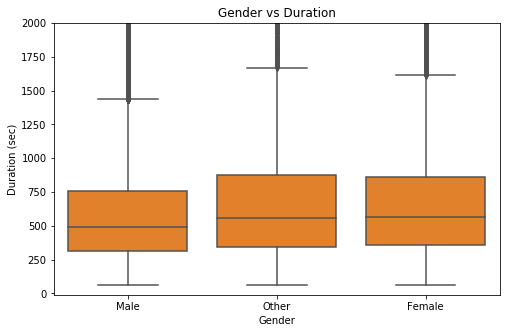

In [ ]:
#boxplot for gender vs duration
plt.figure(figsize = [8, 5])
base_color = sns.color_palette()[1]
sns.boxplot(data = df, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.ylim([-10, 2000])
xyt("Gender", "Duration (sec)", "Gender vs Duration")
plt.show()

The average duration of other genders and females is height than males

<h2>Trip Duration Across Gender and Age Group</h2>

What is the average trip duration across gender and age group?

Firstly we need to create the age groups

In [ ]:
#each age group is 20

rides_age = df[df['age']<=60]
rides_age['member_age_bins'] = rides_age['age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else x)

Creating the plot 

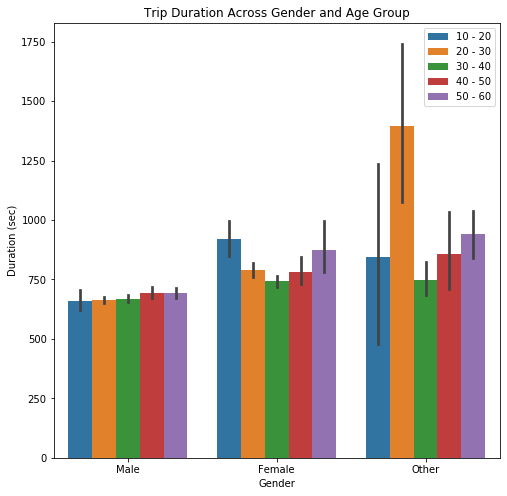

In [ ]:
# create bar plot on gender versus duration on levels of the age bins variable
plt.figure(figsize = [8, 8])
ax = sns.barplot(x='member_gender', y = 'duration_sec', hue='member_age_bins', data=rides_age.sort_values(by= 'member_age_bins'))
xyt('Gender', 'Duration (sec)', 'Trip Duration Across Gender and Age Group')
leg = ax.legend()

In most gender types, the age range of 10-30 has the longest trip duration, except for males which all age groups are nearly the same.